In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

# Importing the CSV file

In [2]:
df=pd.read_csv("battles.csv",sep=';')
df.head(5)



,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,Unnamed: 25
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,NaN,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,NaN,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,NaN,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork,The Riverlands,NaN,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,NaN,NaN


In [3]:
df.columns

Index([u'name', u'year', u'battle_number', u'attacker_king', u'defender_king',
       u'attacker_1', u'attacker_2', u'attacker_3', u'attacker_4',
       u'defender_1', u'defender_2', u'defender_3', u'defender_4',
       u'attacker_outcome', u'battle_type', u'major_death', u'major_capture',
       u'attacker_size', u'defender_size', u'attacker_commander',
       u'defender_commander', u'summer', u'location', u'region', u'note',
       u'Unnamed: 25'],
      dtype='object')

# Let's check some relations between different columns 



### How many Battles each Attacker King have?

In [4]:
df[['attacker_king','name']].groupby('attacker_king').count()

,name
attacker_king,
300,1
Balon/Euron Greyjoy,6
Joffrey/Tommen Baratheon,14
Robb Stark,10
Stannis Baratheon,5


### How many battles are happenning in each location?

In [5]:
df[['name','location']].groupby('location').count().head(5)

,name
location,
Castle Black,1
Crag,1
Darry,2
Deepwood Motte,2
Dragonstone,1


### How many locations are there per region?

In [6]:
df[['region','location']].groupby('region').count()

,location
region,
0,0
Beyond the Wall,1
The Crownlands,2
The North,10
The Reach,1
The Riverlands,16
The Stormlands,3
The Westerlands,3


### What is the average attacker size per Attacker King? 
This one includes substituting `NaN` values with 0s.

In [7]:
df['attacker_size'].fillna(0)
df[['attacker_size','attacker_king']].groupby('attacker_king').mean()

,attacker_size
attacker_king,
300,0.000
Balon/Euron Greyjoy,428.000
Joffrey/Tommen Baratheon,7577.250
Robb Stark,5152.375
Stannis Baratheon,27100.000


# Using NetworkX for creating our graph
It allows for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

See https://networkx.github.io/ for more information.

   # Plotting `attacker_commander` relation with `attacker_king`

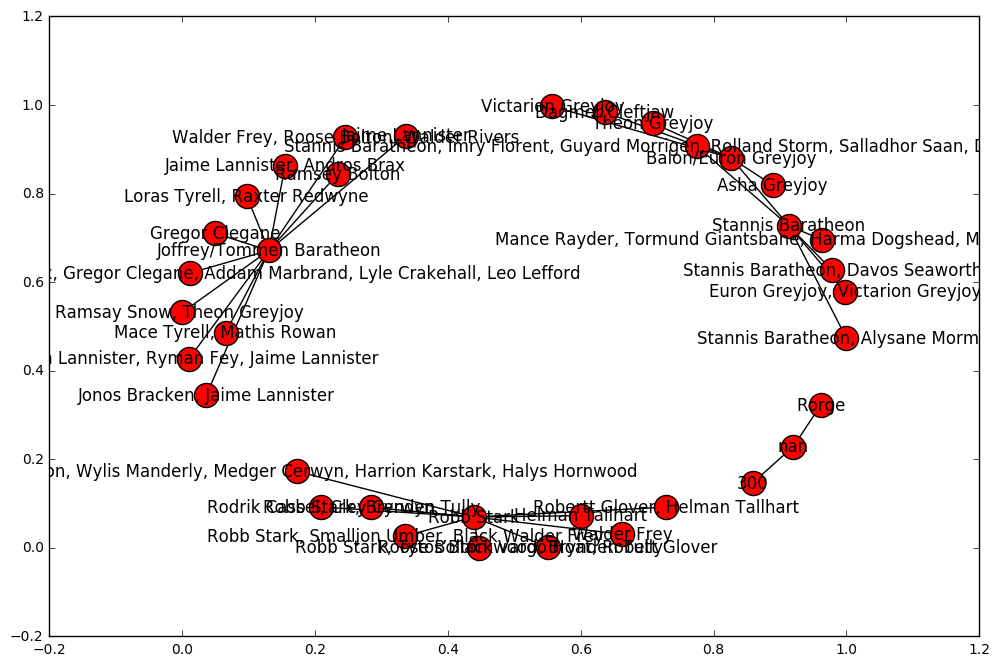

In [8]:
import networkx as nx

plt.figure(figsize=(12,8))
G=nx.from_pandas_dataframe(df,'attacker_king','attacker_commander')
nx.draw_networkx(G,with_labels=True,label='attecker_Commander relation with attacker_king ')
plt.show()


# Distribution of attackers over `attacker_king` s using a bar chart


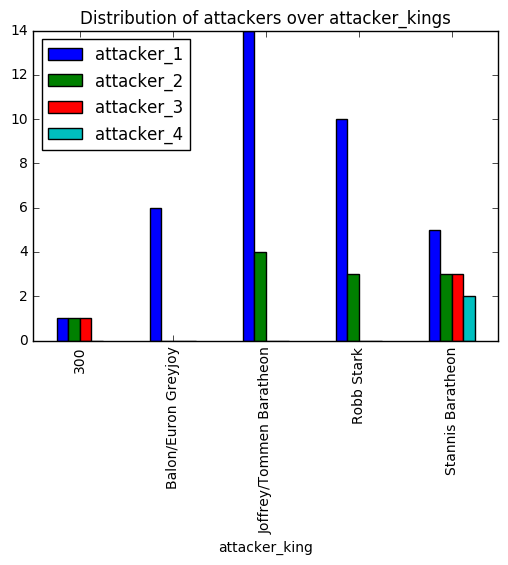

In [9]:
df[['attacker_1','attacker_2','attacker_3','attacker_4','attacker_king']].groupby(
    'attacker_king').count().plot(kind='bar',title='Distribution of attackers over attacker_kings')

# Distribution of `attacker_commander`,`defender_commander`,`defender_king` over `attacker_king` s using a horizontal bar chart (barh)

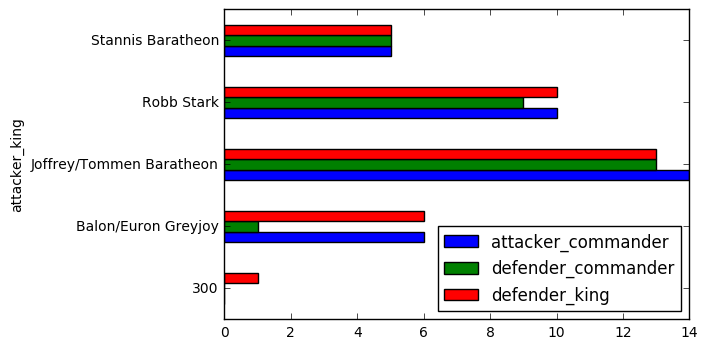

In [10]:
df[['attacker_commander','attacker_king','defender_commander','defender_king']].groupby(
    'attacker_king').count().plot(kind='barh')

# Calculating the `PageRank` function of the graph

The output of the PageRank is a dictionary in which the keys are the nodes of our network graph and the values are the probabilities of entering that node from the other nodes.

In [11]:
pr=nx.pagerank(G)
pr

{nan: 0.04787234042553193,
 '300': 0.017730496453900707,
 'Asha Greyjoy': 0.017567303773603,
 'Balon/Euron Greyjoy': 0.07883014779865172,
 'Dagmer Cleftjaw': 0.017567303773603,
 'Daven Lannister, Ryman Fey, Jaime Lannister': 0.01617496640939734,
 'Euron Greyjoy, Victarion Greyjoy': 0.017567303773603,
 'Gregor Clegane': 0.01617496640939734,
 'Helman Tallhart': 0.016432806662028017,
 'Jaime Lannister': 0.01617496640939734,
 'Jaime Lannister, Andros Brax': 0.01617496640939734,
 'Joffrey/Tommen Baratheon': 0.1554087028299626,
 'Jonos Bracken, Jaime Lannister': 0.01617496640939734,
 'Loras Tyrell, Raxter Redwyne': 0.01617496640939734,
 'Mace Tyrell, Mathis Rowan': 0.01617496640939734,
 'Mance Rayder, Tormund Giantsbane, Harma Dogshead, Magnar Styr, Varamyr': 0.016534391534245664,
 'Ramsay Snow, Theon Greyjoy ': 0.01617496640939734,
 'Ramsey Bolton': 0.01617496640939734,
 'Robb Stark': 0.12988251781952562,
 'Robb Stark, Brynden Tully': 0.016432806662028017,
 'Robb Stark, Smalljon Umber, Blac